In [37]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits

Populating the interactive namespace from numpy and matplotlib


In [210]:
!pwd

/global/u2/h/huikong/obiwan_codes/obiwan_Aug/obiwan_code/py/MS_stars_ipynb


In [38]:
#dr9g_south
dr9g_south=fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9/obiwan_out/dr9_wide/subset/sim_dr9_wide.fits')
#dr9f_south
dr9f_south=fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9/obiwan_out/dr9f_wide/subset/sim_dr9f_wide.fits')

In [206]:
def star_2d(input_table,title='dr9g',LIM=0.4):
    print('these are input-output')
    delta_ra = input_table['MS_delta_ra']/input_table['star_radius']
    delta_dec = input_table['MS_delta_dec']/input_table['star_radius']
    g_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_gflux'] / dr9f_south['mw_transmission_g'])
    r_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_rflux'] / dr9f_south['mw_transmission_r'])
    z_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_zflux'] / dr9f_south['mw_transmission_z'])

    g_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_g'] / dr9f_south['mw_transmission_g'])
    r_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_r'] / dr9f_south['mw_transmission_r'])
    z_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_z'] / dr9f_south['mw_transmission_z'])
    
    g_diff = g_truth-g_measure
    r_diff = r_truth-r_measure
    z_diff = z_truth-z_measure
    sel = (g_diff>-LIM)&(g_diff<LIM)&(r_diff>-LIM)&(r_diff<LIM)&(z_diff>-LIM)&(z_diff<LIM)\
    &(delta_ra<5)&(delta_dec<5)&(delta_ra>-5)&(delta_dec>-5)
    
    delta_ra=delta_ra[sel]
    delta_dec=delta_dec[sel]
    g_diff=g_diff[sel]
    r_diff=r_diff[sel]
    z_diff=z_diff[sel]
    plt.figure(figsize=(10,10))
    h,xedges,yedges,image=plt.hist2d(delta_ra,delta_dec,bins=30,vmax=200)
    
    plt.clf()

    h2,xedges,yedges,image=plt.hist2d(delta_ra,delta_dec,weights=g_diff,bins=[xedges,yedges],vmax=2)
    h_r,xedges,yedges,image=plt.hist2d(delta_ra,delta_dec,weights=r_diff,bins=[xedges,yedges],vmax=2)
    h_z,xedges,yedges,image=plt.hist2d(delta_ra,delta_dec,weights=z_diff,bins=[xedges,yedges],vmax=2)
    plt.colorbar()
    plt.clf()
    
    
    plt.subplot(2,2,1)
    img=h2/h
    plt.imshow(img.transpose(),vmax=0.02,vmin=-0.02,cmap='coolwarm')
    plt.colorbar()

    plt.ylabel('dec')
    plt.title(title+' g mag')
    plt.xticks([0,8,15,22,29],['%.0f'%xedges[0],'%.1f'%xedges[8],\
                                '0','%.1f'%xedges[22],'%.0f'%xedges[30]])
    plt.yticks([0,8,15,22,29],['%.0f'%yedges[0],'%.1f'%yedges[8],\
                                '0','%.1f'%yedges[22],'%.0f'%yedges[30]])
    
    plt.subplot(2,2,2)
    
    img=h_r/h
    plt.imshow(img.transpose(),vmax=0.02,vmin=-0.02,cmap='coolwarm')
    plt.colorbar()
    plt.xlabel('ra')

    plt.title(title+' r mag')
    plt.xticks([0,8,15,22,29],['%.0f'%xedges[0],'%.1f'%xedges[8],\
                                '0','%.1f'%xedges[22],'%.0f'%xedges[30]])
    plt.yticks([0,8,15,22,29],['%.0f'%yedges[0],'%.1f'%yedges[8],\
                                '0','%.1f'%yedges[22],'%.0f'%yedges[30]])
    
    
    plt.subplot(2,2,3)
    
    img=h_z/h
    plt.imshow(img.transpose(),vmax=0.02,vmin=-0.02,cmap='coolwarm')
    plt.colorbar()
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title(title+' r mag')
    plt.xticks([0,8,15,22,29],['%.0f'%xedges[0],'%.1f'%xedges[8],\
                                '0','%.1f'%xedges[22],'%.0f'%xedges[30]])
    plt.yticks([0,8,15,22,29],['%.0f'%yedges[0],'%.1f'%yedges[8],\
                                '0','%.1f'%yedges[22],'%.0f'%yedges[30]])
    
    
    
    return h

these are input-output


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: 

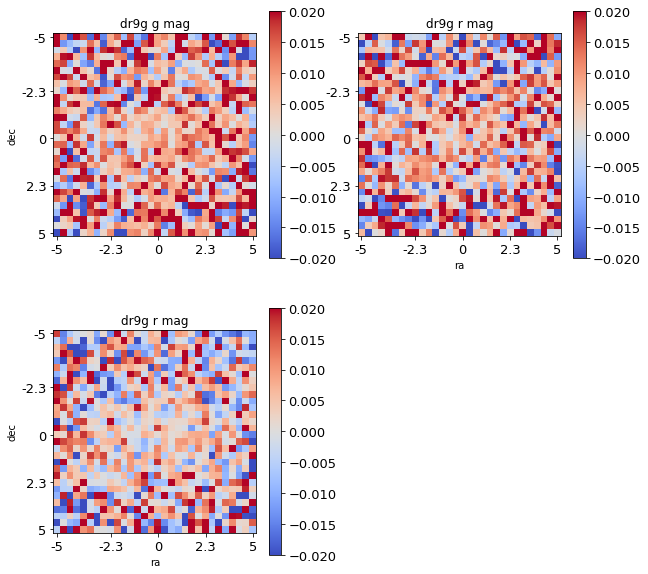

In [207]:
h2=star_2d(dr9g_south)

these are input-output


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: 

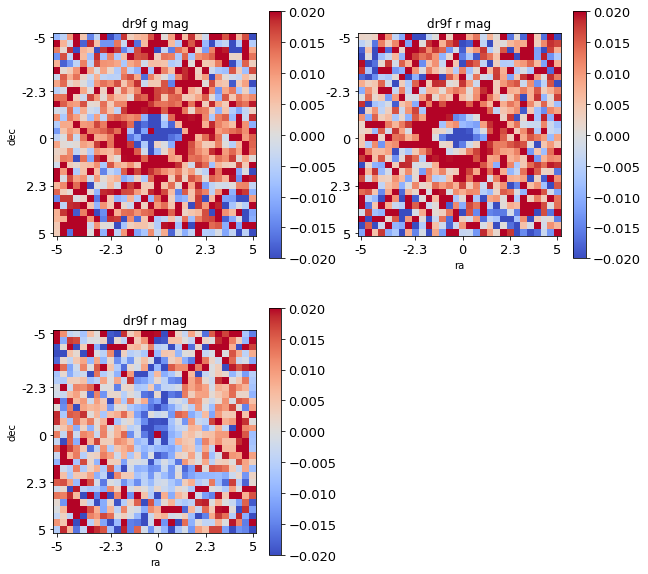

In [208]:
h2=star_2d(dr9f_south,title='dr9f')

1.08926088779e-05
0.00221148734333


Text(0,0.5,'by')

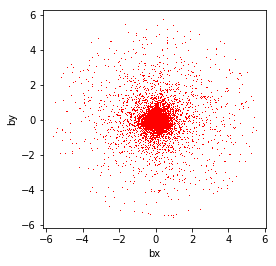

In [3]:
sel=dr9g_south['detected']
plt.figure(figsize=(4,4))
print((dr9g_south[sel]['bx']-dr9g_south[sel]['sim_bx']).mean())
print((dr9g_south[sel]['by']-dr9g_south[sel]['sim_by']).mean())
plt.plot(dr9g_south[sel]['bx']-dr9g_south[sel]['sim_bx'],dr9g_south[sel]['by']-dr9g_south[sel]['sim_by'],'r,')
plt.xlabel('bx')
plt.ylabel('by')

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: Runt

Text(0.5,0,'g mag')

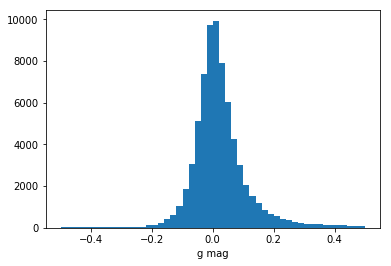

In [4]:
dr9g_south=dr9g_south[dr9g_south['detected']]

g_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_gflux'] / dr9g_south['mw_transmission_g'])
r_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_rflux'] / dr9g_south['mw_transmission_r'])
z_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_zflux'] / dr9g_south['mw_transmission_z'])

g_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_g'] / dr9g_south['mw_transmission_g'])
r_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_r'] / dr9g_south['mw_transmission_r'])
z_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_z'] / dr9g_south['mw_transmission_z'])

sel = ((g_truth-g_measure)>-0.5)&((g_truth-g_measure)<0.5)
p=plt.hist(g_truth[sel]-g_measure[sel],bins=50)
(g_truth[sel]-g_measure[sel]).mean()
plt.xlabel('g mag')

In [5]:
def histplot(input_table,flux_type,region,run_type):
    isMedium=input_table['maskbits']>>11&1
    isBright=input_table['maskbits']>>1&1
    sel0 = (input_table['flux_ivar_%s'%flux_type]!=0)
    #sel0=True
    sel_stars=np.array(isMedium&~isBright,dtype=np.bool)
    sel = sel0&sel_stars&((input_table['flux_%s'%flux_type]-input_table['sim_%sflux'%flux_type])>-1.)&((input_table['flux_%s'%flux_type]-input_table['sim_%sflux'%flux_type])<1.)
    p=plt.hist(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel],bins=50,density=True)
    plt.title('MS dr9%s_%s %s flux'%(run_type,region,flux_type))
    mean=(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel]).mean()
    std=(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel]).std()
    plt.text(0.3,0.5,"%.7s+/-%.6s"%(mean,std))

    detection_rate=input_table['detected'].sum()/len(input_table)
    plt.text(0.3,0.8,"detection rate:%.4f"%detection_rate)

    v_rate=sel.sum()/len(input_table)
    plt.text(0.3,1.1,"valid rate:%.4f"%v_rate)
    
    valid_var = (~(input_table['flux_ivar_%s'%flux_type]==0))&sel
    valid_var_rate = valid_var.sum()/len(input_table)
    plt.text(0.3,1.4,"non-zero var:%.4f"%valid_var_rate)
    
    
def histplot_r(input_table,flux_type,region,run_type):
    isMedium=input_table['maskbits']>>11&1
    isBright=input_table['maskbits']>>1&1
    sel0 = (input_table['flux_ivar_%s'%flux_type]!=0)
    #sel0=True
    sel_stars=np.array(isMedium&~isBright,dtype=np.bool)
    sel = sel0&sel_stars&((input_table['flux_%s'%flux_type]-input_table['sim_%sflux'%flux_type])>-1.)&((input_table['flux_%s'%flux_type]-input_table['sim_%sflux'%flux_type])<1.)
    p=plt.hist(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel],bins=50,density=True)
    plt.title('MS dr9%s_%s %s flux'%(run_type,region,flux_type))
    mean=(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel]).mean()
    std=(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel]).std()
    plt.text(0.3,0.8,"%.7s+/-%.6s"%(mean,std))

    detection_rate=input_table['detected'].sum()/len(input_table)
    plt.text(0.3,1,"detection rate:%.4f"%detection_rate)

    v_rate=sel.sum()/len(input_table)
    plt.text(0.3,1.2,"valid rate:%.4f"%v_rate)
    
    valid_var = (~(input_table['flux_ivar_%s'%flux_type]==0))&sel
    valid_var_rate = valid_var.sum()/len(input_table)
    plt.text(0.3,1.4,"non-zero var:%.4f"%valid_var_rate)    

def histplot_z(input_table,flux_type,region,run_type):
    isMedium=input_table['maskbits']>>11&1
    isBright=input_table['maskbits']>>1&1
    sel_stars=np.array(isMedium&~isBright,dtype=np.bool)
    sel0 = (input_table['flux_ivar_%s'%flux_type]!=0)
    sel = sel0&sel_stars&((input_table['flux_%s'%flux_type]-input_table['sim_%sflux'%flux_type])>-1)&((input_table['flux_%s'%flux_type]-input_table['sim_%sflux'%flux_type])<1)
    p=plt.hist(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel],bins=50,density=True)
    plt.title('MS dr9%s_%s %s flux'%(run_type,region,flux_type))
    mean=(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel]).mean()
    std=(input_table['flux_%s'%flux_type][sel]-input_table['sim_%sflux'%flux_type][sel]).std()
    plt.text(0.2,1.5,"%.7s+/-%.6s"%(mean,std))

    detection_rate=input_table['detected'].sum()/len(input_table)
    plt.text(0.2,1.7,"detection rate:%.4f"%detection_rate)

    v_rate=sel.sum()/len(input_table)
    detection_rate=input_table['detected'].sum()/len(input_table)
    plt.text(0.2,1.9,"valid rate:%.4f"%v_rate)
    
    valid_var = (~(input_table['flux_ivar_%s'%flux_type]==0))&sel
    valid_var_rate = valid_var.sum()/len(input_table)
    plt.text(0.2,2.1,"non-zero var:%.4f"%valid_var_rate)

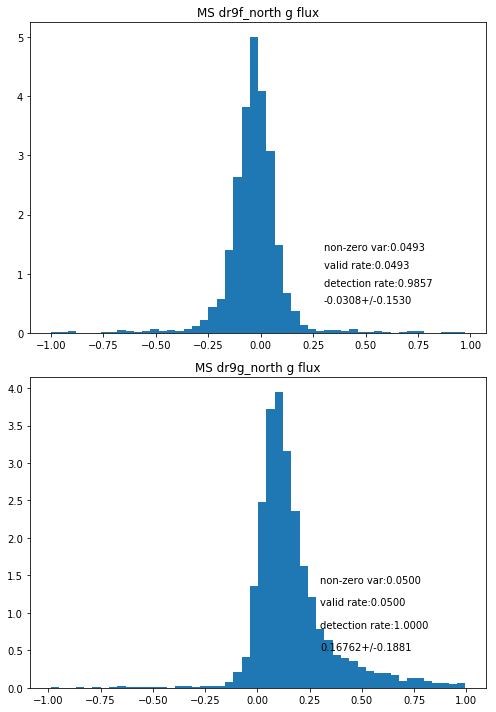

In [8]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
histplot(dr9f_south,'g','north','f')


plt.subplot(2,1,2)
histplot(dr9g_south,'g','north','g')

plt.tight_layout()

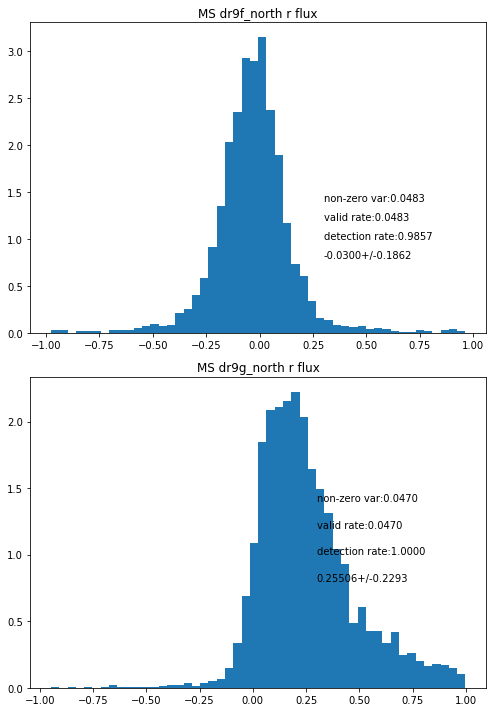

In [9]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
histplot_r(dr9f_south,'r','north','f')

plt.subplot(2,1,2)
histplot_r(dr9g_south,'r','north','g')

plt.tight_layout()

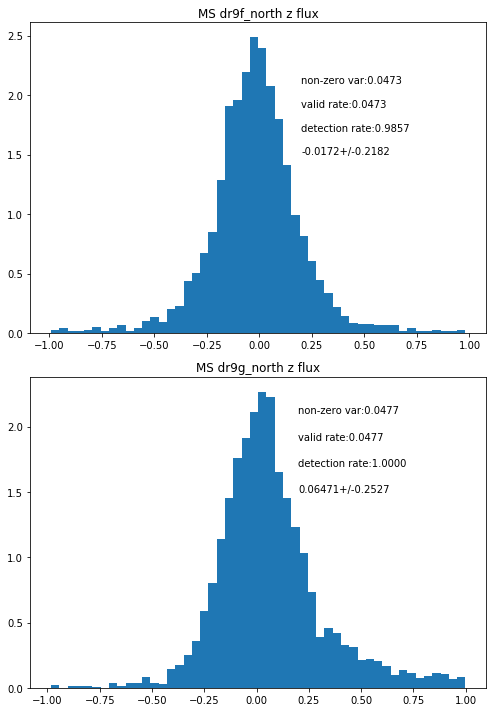

In [10]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
histplot_z(dr9f_south,'z','north','f')


plt.subplot(2,1,2)
histplot_z(dr9g_south,'z','north','g')

plt.tight_layout()

In [24]:
def get_percentile(y,x,bins,percen_num):#25,50,75
    minimum = x.min()
    maximum = x.max()
    interval = (maximum-minimum)/bins
    percent_list=[]
    mid_list = []
    for i in range(bins):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        mid = minimum+(i+0.5)*interval
        y_i = y[(x>left)&(x<=right)]
        if len(y_i)>0:
            output = np.percentile(y_i,percen_num)
            percent_list.append(output)
            mid_list.append(mid)
    return percent_list,mid_list




def one_subplot_flux(f_type,mag_truth,input_table,lim=1):
    isMedium=input_table['maskbits']>>11&1
    isBright=input_table['maskbits']>>1&1
    sel_stars=np.array(isMedium&~isBright,dtype=np.bool)
    sel=~(input_table['flux_ivar_'+f_type]==0)
    flux_diff = (input_table['flux_'+f_type]-input_table['sim_'+f_type+'flux'])*np.sqrt(input_table['flux_ivar_'+f_type])
    y = flux_diff[(flux_diff>-lim)&(flux_diff<lim)&sel&sel_stars]
    x = mag_truth[(flux_diff>-lim)&(flux_diff<lim)&sel&sel_stars]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)
    
    y_all=flux_diff[sel&sel_stars&(flux_diff>-5)&(flux_diff<5)]
    x_all=mag_truth[sel&sel_stars&(flux_diff>-5)&(flux_diff<5)]
    yl,xl = get_percentile(y_all,x_all,40,84)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y_all,x_all,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y_all,x_all,40,16)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+'Flux/'+r'$\sigma$'+' (tractor-truth)')

matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('xtick', labelsize=13)
plt.rcParams.update({'font.size': 15})


def one_subplot_mag(input_table,f_type,mag_truth,mag_measure,lim=0.1):
    isMedium=input_table['maskbits']>>11&1
    isBright=input_table['maskbits']>>1&1
    sel_stars=np.array(isMedium&~isBright,dtype=np.bool)
    mag_diff = mag_truth - mag_measure
    y = mag_diff[(mag_diff>-lim)&(mag_diff<lim)&sel_stars]
    x = mag_truth[(mag_diff>-lim)&(mag_diff<lim)&sel_stars]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.3)

    y_all=mag_diff[sel_stars&(mag_diff>-2)&(mag_diff<2)]
    x_all=mag_truth[sel_stars&(mag_diff>-2)&(mag_diff<2)]
    yl,xl = get_percentile(y_all,x_all,40,84)
    
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y_all,x_all,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y_all,x_all,40,16)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+ f_type +' (truth-tractor)')



/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: Runt

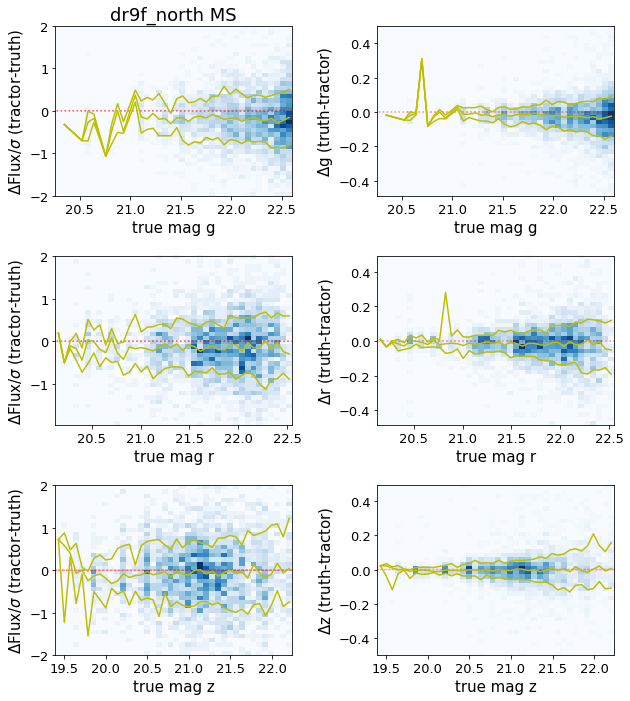

In [26]:

g_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_gflux'] / dr9f_south['mw_transmission_g'])
r_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_rflux'] / dr9f_south['mw_transmission_r'])
z_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_zflux'] / dr9f_south['mw_transmission_z'])

g_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_g'] / dr9f_south['mw_transmission_g'])
r_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_r'] / dr9f_south['mw_transmission_r'])
z_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_z'] / dr9f_south['mw_transmission_z'])

lower=np.percentile(g_truth,1);upper=np.percentile(g_truth,99)
sel_g=(g_truth>lower)&(g_truth<upper)
lower=np.percentile(r_truth,1);upper=np.percentile(r_truth,99)
sel_r=(r_truth>lower)&(r_truth<upper)
lower=np.percentile(z_truth,1);upper=np.percentile(z_truth,99)
sel_z=(z_truth>lower)&(z_truth<upper)
sel=sel_g&sel_r&sel_z

g_truth=g_truth[sel]
r_truth=r_truth[sel]
z_truth=z_truth[sel]
g_measure=g_measure[sel]
r_measure=r_measure[sel]
z_measure=z_measure[sel]

input_table=dr9f_south[sel]

plt.figure(figsize=(9,10)) 

plt.subplot(3,2,1)  
plt.title('dr9f_north MS')
one_subplot_flux('g',g_truth,input_table,2)
plt.subplot(3,2,3)    
one_subplot_flux('r',r_truth,input_table,2)
plt.subplot(3,2,5)    
one_subplot_flux('z',z_truth,input_table,2)
plt.tight_layout()


plt.subplot(3,2,2)    
one_subplot_mag(input_table,'g',g_truth,g_measure,0.5)
plt.subplot(3,2,4)    
one_subplot_mag(input_table,'r',r_truth,r_measure,0.5)
plt.subplot(3,2,6)    
one_subplot_mag(input_table,'z',z_truth,z_measure,0.5)

plt.tight_layout()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: Runt

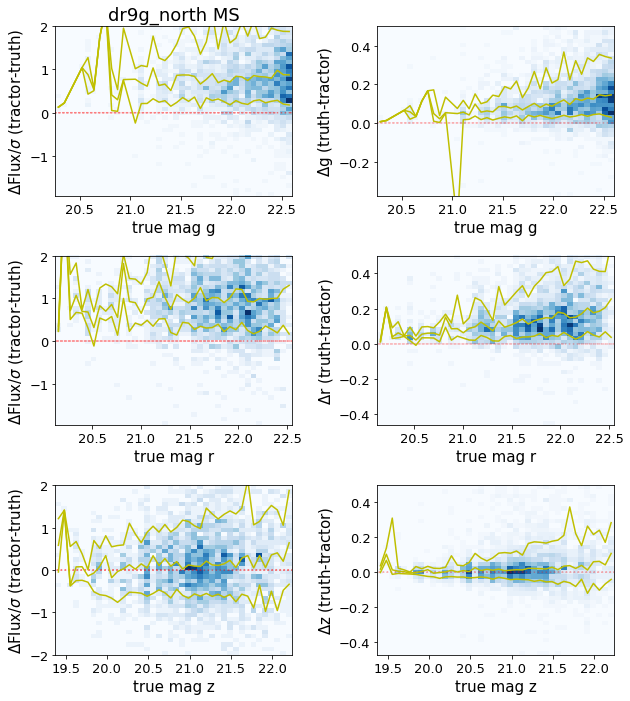

In [27]:

g_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_gflux'] / dr9g_south['mw_transmission_g'])
r_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_rflux'] / dr9g_south['mw_transmission_r'])
z_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_zflux'] / dr9g_south['mw_transmission_z'])

g_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_g'] / dr9g_south['mw_transmission_g'])
r_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_r'] / dr9g_south['mw_transmission_r'])
z_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_z'] / dr9g_south['mw_transmission_z'])

lower=np.percentile(g_truth,1);upper=np.percentile(g_truth,99)
sel_g=(g_truth>lower)&(g_truth<upper)
lower=np.percentile(r_truth,1);upper=np.percentile(r_truth,99)
sel_r=(r_truth>lower)&(r_truth<upper)
lower=np.percentile(z_truth,1);upper=np.percentile(z_truth,99)
sel_z=(z_truth>lower)&(z_truth<upper)
sel=sel_g&sel_r&sel_z

g_truth=g_truth[sel]
r_truth=r_truth[sel]
z_truth=z_truth[sel]
g_measure=g_measure[sel]
r_measure=r_measure[sel]
z_measure=z_measure[sel]

input_table=dr9g_south[sel]

plt.figure(figsize=(9,10)) 

plt.subplot(3,2,1)  
plt.title('dr9g_north MS')
one_subplot_flux('g',g_truth,input_table,2)
plt.subplot(3,2,3)    
one_subplot_flux('r',r_truth,input_table,2)
plt.subplot(3,2,5)    
one_subplot_flux('z',z_truth,input_table,2)
plt.tight_layout()


plt.subplot(3,2,2)    
one_subplot_mag(input_table,'g',g_truth,g_measure,0.5)
plt.subplot(3,2,4)    
one_subplot_mag(input_table,'r',r_truth,r_measure,0.5)
plt.subplot(3,2,6)    
one_subplot_mag(input_table,'z',z_truth,z_measure,0.5)

plt.tight_layout()

In [31]:
def get_percentile(y,x,bins,percen_num):#25,50,75
    minimum = x.min()
    maximum = x.max()
    interval = (maximum-minimum)/bins
    percent_list=[]
    mid_list = []
    for i in range(bins):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        mid = minimum+(i+0.5)*interval
        y_i = y[(x>left)&(x<=right)]
        if len(y_i)>0:
            output = np.percentile(y_i,percen_num)
            percent_list.append(output)
            mid_list.append(mid)
    return percent_list,mid_list




def one_subplot_flux_nonMS(f_type,mag_truth,input_table,lim=1):
    isMedium=input_table['maskbits']>>11&1
    isBright=input_table['maskbits']>>1&1
    sel_stars=np.array(isMedium&~isBright,dtype=np.bool)
    sel=~(input_table['flux_ivar_'+f_type]==0)
    flux_diff = (input_table['flux_'+f_type]-input_table['sim_'+f_type+'flux'])*np.sqrt(input_table['flux_ivar_'+f_type])
    y = flux_diff[(flux_diff>-lim)&(flux_diff<lim)&sel&~sel_stars]
    x = mag_truth[(flux_diff>-lim)&(flux_diff<lim)&sel&~sel_stars]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)
    
    y_all=flux_diff[sel&~sel_stars&(flux_diff>-5)&(flux_diff<5)]
    x_all=mag_truth[sel&~sel_stars&(flux_diff>-5)&(flux_diff<5)]
    yl,xl = get_percentile(y_all,x_all,40,84)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y_all,x_all,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y_all,x_all,40,16)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+'Flux/'+r'$\sigma$'+' (tractor-truth)')

matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('xtick', labelsize=13)
plt.rcParams.update({'font.size': 15})


def one_subplot_mag_nonMS(input_table,f_type,mag_truth,mag_measure,lim=0.1):
    isMedium=input_table['maskbits']>>11&1
    isBright=input_table['maskbits']>>1&1
    sel_stars=np.array(isMedium|~isBright,dtype=np.bool)
    sel=~(input_table['flux_ivar_'+f_type]==0)
    mag_diff = mag_truth - mag_measure
    y = mag_diff[(mag_diff>-lim)&(mag_diff<lim)&~sel_stars&sel]
    x = mag_truth[(mag_diff>-lim)&(mag_diff<lim)&~sel_stars&sel]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.3)

    y_all=mag_diff[sel_stars&(mag_diff>-2)&(mag_diff<2)]
    x_all=mag_truth[sel_stars&(mag_diff>-2)&(mag_diff<2)]
    yl,xl = get_percentile(y_all,x_all,40,84)
    
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y_all,x_all,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y_all,x_all,40,16)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+ f_type +' (truth-tractor)')

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: Runt

0.0014434489817886317

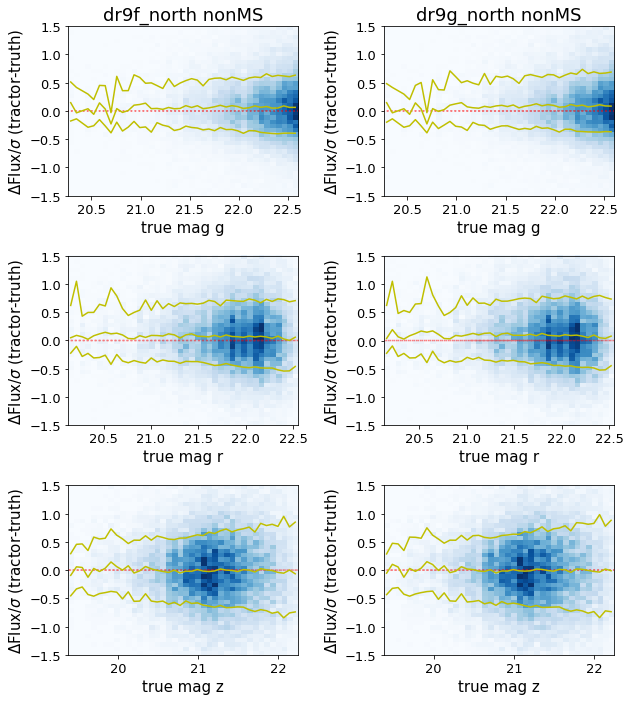

In [32]:
g_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_gflux'] / dr9f_south['mw_transmission_g'])
r_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_rflux'] / dr9f_south['mw_transmission_r'])
z_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_zflux'] / dr9f_south['mw_transmission_z'])

star_dis = dr9f_south['star_distance']/dr9f_south['star_radius']

g_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_g'] / dr9f_south['mw_transmission_g'])
r_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_r'] / dr9f_south['mw_transmission_r'])
z_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_z'] / dr9f_south['mw_transmission_z'])

sel_dis = (star_dis<5)&(star_dis>0.99)
lower=np.percentile(g_truth,1);upper=np.percentile(g_truth,99)
sel_g=(g_truth>lower)&(g_truth<upper)
lower=np.percentile(r_truth,1);upper=np.percentile(r_truth,99)
sel_r=(r_truth>lower)&(r_truth<upper)
lower=np.percentile(z_truth,1);upper=np.percentile(z_truth,99)
sel_z=(z_truth>lower)&(z_truth<upper)
sel=sel_g&sel_r&sel_z&sel_dis

g_truth=g_truth[sel]
r_truth=r_truth[sel]
z_truth=z_truth[sel]
g_measure=g_measure[sel]
r_measure=r_measure[sel]
z_measure=z_measure[sel]
star_dis = star_dis[sel]

input_table=dr9f_south[sel]

plt.figure(figsize=(9,10)) 

plt.subplot(3,2,1)  
plt.title('dr9f_north nonMS')

one_subplot_flux_nonMS('g',g_truth,input_table,1.5)
plt.subplot(3,2,3)    
one_subplot_flux_nonMS('r',r_truth,input_table,1.5)
plt.subplot(3,2,5)    
one_subplot_flux_nonMS('z',z_truth,input_table,1.5)
plt.tight_layout()



#----------------------------------------------------------------------

g_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_gflux'] / dr9g_south['mw_transmission_g'])
r_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_rflux'] / dr9g_south['mw_transmission_r'])
z_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_zflux'] / dr9g_south['mw_transmission_z'])

g_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_g'] / dr9g_south['mw_transmission_g'])
r_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_r'] / dr9g_south['mw_transmission_r'])
z_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_z'] / dr9g_south['mw_transmission_z'])
star_dis = dr9g_south['star_distance']/dr9g_south['star_radius']

sel_dis = (star_dis<5)&(star_dis>0.99)
lower=np.percentile(g_truth,1);upper=np.percentile(g_truth,99)
sel_g=(g_truth>lower)&(g_truth<upper)
lower=np.percentile(r_truth,1);upper=np.percentile(r_truth,99)
sel_r=(r_truth>lower)&(r_truth<upper)
lower=np.percentile(z_truth,1);upper=np.percentile(z_truth,99)
sel_z=(z_truth>lower)&(z_truth<upper)
sel=sel_g&sel_r&sel_z&sel_dis

g_truth=g_truth[sel]
r_truth=r_truth[sel]
z_truth=z_truth[sel]
g_measure=g_measure[sel]
r_measure=r_measure[sel]
z_measure=z_measure[sel]
star_dis=star_dis[sel]
input_table=dr9g_south[sel]

#plt.figure(figsize=(9,10)) 

plt.subplot(3,2,2)  
plt.title('dr9g_north nonMS')
one_subplot_flux_nonMS('g',g_truth,input_table,1.5)
plt.subplot(3,2,4)    
one_subplot_flux_nonMS('r',r_truth,input_table,1.5)
plt.subplot(3,2,6)    
one_subplot_flux_nonMS('z',z_truth,input_table,1.5)
plt.tight_layout()

dr9g_south['star_radius'].mean()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: Runt

0.0014434489817886317

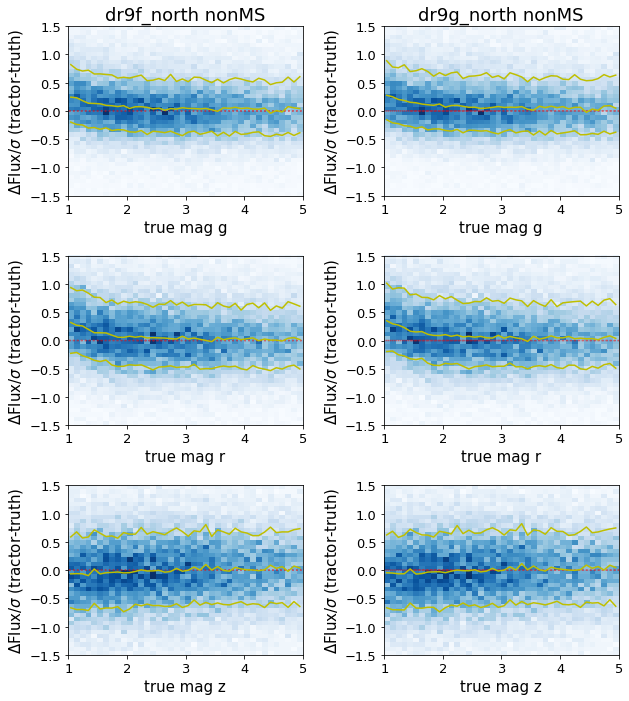

In [29]:
g_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_gflux'] / dr9f_south['mw_transmission_g'])
r_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_rflux'] / dr9f_south['mw_transmission_r'])
z_truth = 22.5 - 2.5 * np.log10(dr9f_south['sim_zflux'] / dr9f_south['mw_transmission_z'])

star_dis = dr9f_south['star_distance']/dr9f_south['star_radius']

g_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_g'] / dr9f_south['mw_transmission_g'])
r_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_r'] / dr9f_south['mw_transmission_r'])
z_measure = 22.5 - 2.5 * np.log10(dr9f_south['flux_z'] / dr9f_south['mw_transmission_z'])

sel_dis = (star_dis<5)&(star_dis>0.99)
lower=np.percentile(g_truth,1);upper=np.percentile(g_truth,99)
sel_g=(g_truth>lower)&(g_truth<upper)
lower=np.percentile(r_truth,1);upper=np.percentile(r_truth,99)
sel_r=(r_truth>lower)&(r_truth<upper)
lower=np.percentile(z_truth,1);upper=np.percentile(z_truth,99)
sel_z=(z_truth>lower)&(z_truth<upper)
sel=sel_g&sel_r&sel_z&sel_dis

g_truth=g_truth[sel]
r_truth=r_truth[sel]
z_truth=z_truth[sel]
g_measure=g_measure[sel]
r_measure=r_measure[sel]
z_measure=z_measure[sel]
star_dis = star_dis[sel]

input_table=dr9f_south[sel]

plt.figure(figsize=(9,10)) 

plt.subplot(3,2,1)  
plt.title('dr9f_north nonMS')

one_subplot_flux_nonMS('g',star_dis,input_table,1.5)
plt.subplot(3,2,3)    
one_subplot_flux_nonMS('r',star_dis,input_table,1.5)
plt.subplot(3,2,5)    
one_subplot_flux_nonMS('z',star_dis,input_table,1.5)
plt.tight_layout()



#----------------------------------------------------------------------

g_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_gflux'] / dr9g_south['mw_transmission_g'])
r_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_rflux'] / dr9g_south['mw_transmission_r'])
z_truth = 22.5 - 2.5 * np.log10(dr9g_south['sim_zflux'] / dr9g_south['mw_transmission_z'])

g_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_g'] / dr9g_south['mw_transmission_g'])
r_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_r'] / dr9g_south['mw_transmission_r'])
z_measure = 22.5 - 2.5 * np.log10(dr9g_south['flux_z'] / dr9g_south['mw_transmission_z'])
star_dis = dr9g_south['star_distance']/dr9g_south['star_radius']

sel_dis = (star_dis<5)&(star_dis>0.99)
lower=np.percentile(g_truth,1);upper=np.percentile(g_truth,99)
sel_g=(g_truth>lower)&(g_truth<upper)
lower=np.percentile(r_truth,1);upper=np.percentile(r_truth,99)
sel_r=(r_truth>lower)&(r_truth<upper)
lower=np.percentile(z_truth,1);upper=np.percentile(z_truth,99)
sel_z=(z_truth>lower)&(z_truth<upper)
sel=sel_g&sel_r&sel_z&sel_dis

g_truth=g_truth[sel]
r_truth=r_truth[sel]
z_truth=z_truth[sel]
g_measure=g_measure[sel]
r_measure=r_measure[sel]
z_measure=z_measure[sel]
star_dis=star_dis[sel]
input_table=dr9g_south[sel]

#plt.figure(figsize=(9,10)) 

plt.subplot(3,2,2)  
plt.title('dr9g_north nonMS')
one_subplot_flux_nonMS('g',star_dis,input_table,1.5)
plt.subplot(3,2,4)    
one_subplot_flux_nonMS('r',star_dis,input_table,1.5)
plt.subplot(3,2,6)    
one_subplot_flux_nonMS('z',star_dis,input_table,1.5)
plt.tight_layout()

dr9g_south['star_radius'].mean()

In [17]:
input_table=dr9g_south
isMedium=input_table['maskbits']>>11&1
isBright=input_table['maskbits']>>1&1
sel_stars=isMedium&~isBright

In [18]:
sel_stars.sum()/len(sel_stars),sel_stars.sum()

(0.047398529011168616, 174)

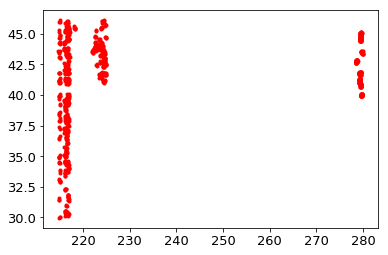

In [44]:
sel_stars=np.array(sel_stars,dtype=np.bool)
plt.plot(dr9g_south[sel_stars]['ra'],dr9g_south[sel_stars]['dec'],'r.')

In [45]:
len(sel_stars)

3909